### Time Series Analysis
- time series decomposition

In [1]:
import yfinance as yf
import matplotlib.pyplot as   plt

stock_data = yf.download('TSLA', start='2025-01-01')
stock_data.head(10)

/tmp/ipython-input-3448270020.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('TSLA', start='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-01-02,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03,410.440002,411.880005,379.450012,381.480011,95423300
2025-01-06,411.049988,426.429993,401.700012,423.200012,85516500
2025-01-07,394.359985,414.329987,390.000000,405.829987,75699500
2025-01-08,394.940002,402.500000,387.399994,392.950012,73038800
2025-01-10,394.739990,399.279999,377.290009,391.399994,62287300
2025-01-13,403.309998,403.790009,380.070007,383.209991,67580500
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000


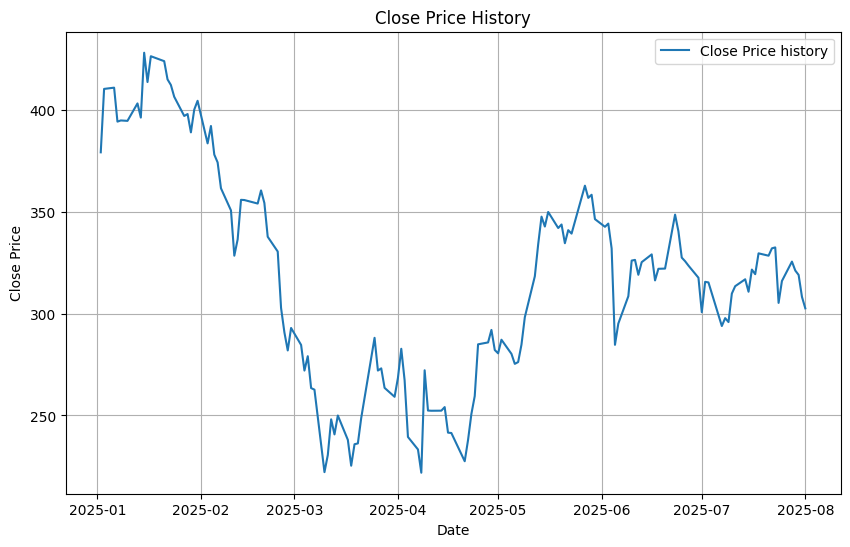

In [2]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### the fluctuations are mostly constant...so it's addtive

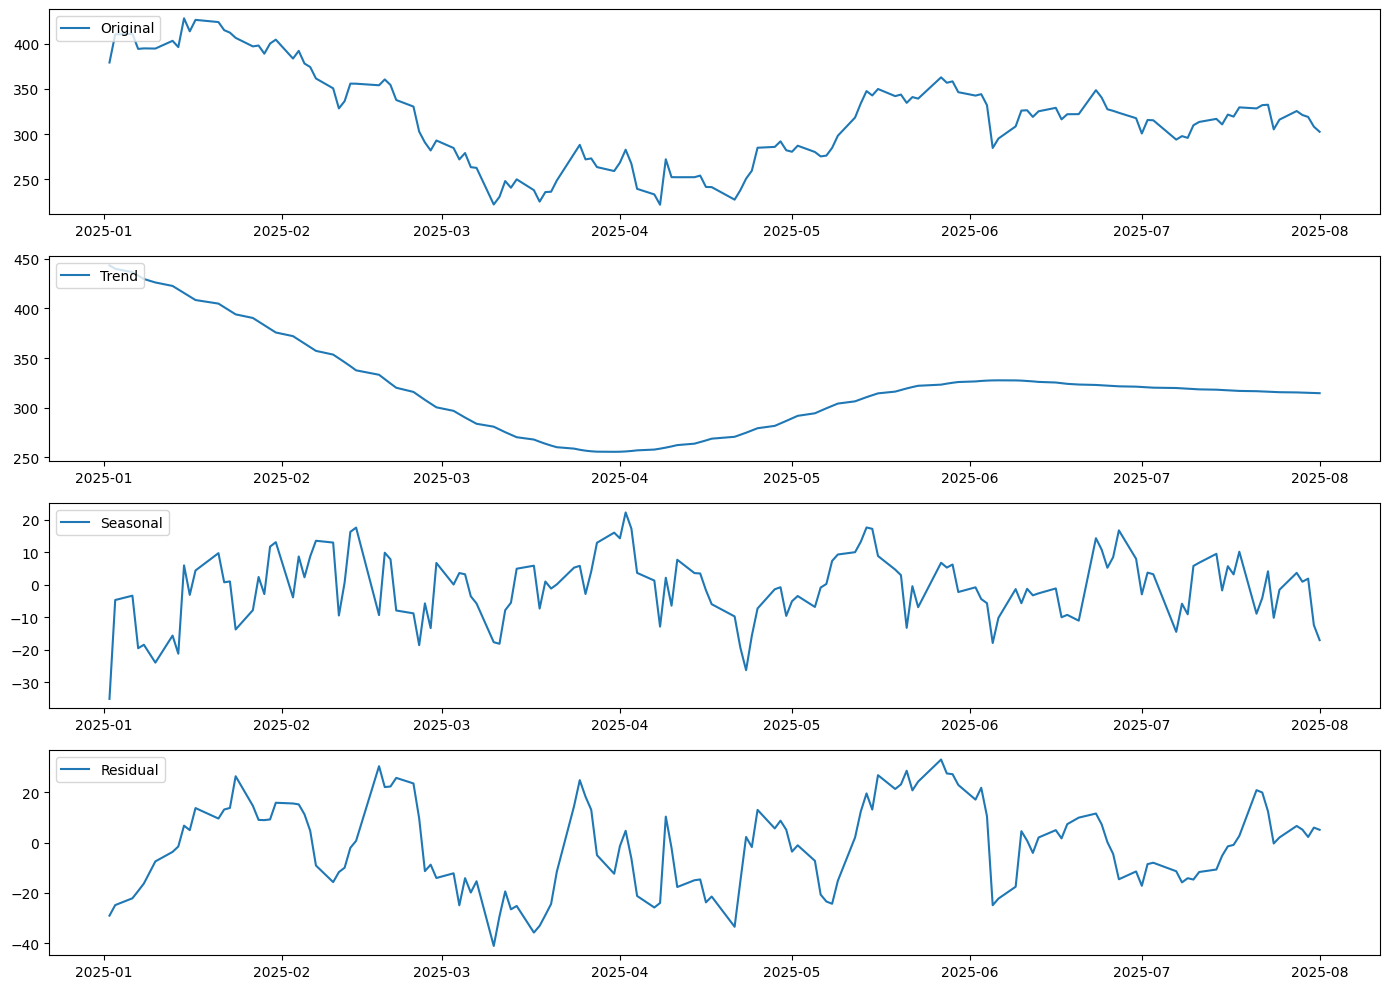

In [3]:
from statsmodels.tsa.seasonal import STL

## STL Decomposition...-> only applied to Addtive
stl1   = STL(stock_data['Close'], period=30)
result   = stl1.fit()

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()